In [2]:
!pip install wordcloud
!pip install nltk


In [3]:
import os
#import numpy as np
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re

stopwords = set(stopwords.words('english'))


df_posts = pd.read_csv('../data/senti_posts.zip').drop(6161)
df_posts['timestamp'] = pd.to_datetime(df_posts['timestamp'])
df_posts['score'] = pd.to_numeric(df_posts['score'])
df_posts['hour_day'] = pd.to_datetime(df_posts['timestamp'].dt.strftime('%Y-%m-%dT%H'))
df_posts = df_posts[df_posts['hour_day'] >= '2021-01-29']
df_posts['title'] = df_posts['title'].fillna('')
df_posts['body'] = df_posts['body'].fillna('')


df_comments = pd.read_csv('../data/senti_comments.zip', lineterminator='\n') \
    .merge(df_posts[['id', 'hour_day']], left_on='id_col', right_on='id') \
    .drop('id', axis=1)
df_comments = df_comments[df_comments['hour_day'] >= '2021-01-29']
df_comments['comments'] = df_comments['comments'].fillna('')

# Join the 'title' and 'body' columns
df_posts['combined_text'] = df_posts['title'] + ' ' + df_posts['body']


# Create a new DataFrame with the desired columns from df_posts
df_combined = pd.DataFrame({
    'text': df_posts['combined_text'].fillna(''),
    'id': df_posts['id'],
    'sent_label': df_posts['sent_label'],
    'sent_score': df_posts['sent_score']
})

# Create a new DataFrame with the desired columns from df_comments
df_comments_combined = pd.DataFrame({
    'text': df_comments['comments'].fillna(''),
    'id': df_comments['id_col'],
    'sent_label': df_comments['sent_label'],
    'sent_score': df_comments['sent_score']
})

# Concatenate df_combined and df_comments_combined
df_combined = pd.concat([df_combined, df_comments_combined], ignore_index=True)


# Create a dataframe for positive labels
df_positive = df_combined[df_combined['sent_label'] == 'positive']
df_positive = df_positive.reset_index(drop=True)
# Create a dataframe for negative labels
df_negative = df_combined[df_combined['sent_label'] == 'negative']
df_negative = df_negative.reset_index(drop=True)

df_negative.head()



[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,id,sent_label,sent_score
0,Current data on GME short positions Is there d...,l6yxto,negative,0.990254
1,xspa anything on xspa stock i thought itll soa...,l6yxjc,negative,0.997744
2,YOU CAN BUY THROUGH top 100 list !!!!!! On RH ...,l6yx9c,negative,0.975635
3,WHATS THIS BULLSHIT WHY CANT I BUY MORE SHARES...,l6yx91,negative,0.998956
4,THE MOVIE A BUGS LIFE WARNED ABOUT THESE FUCKS...,l6yx8r,negative,0.998236


In [7]:
def clean_text(text):
    # Remove emojis
    emoji_pattern = re.compile("["
                   
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text

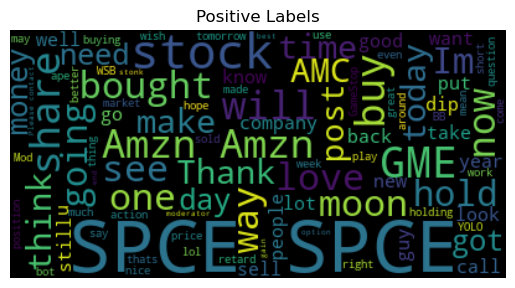

In [13]:
# Apply clean_text function to the 'text' column in df_positive using .loc
df_positive.loc[:, 'cleaned_text'] = df_positive['text'].apply(clean_text)

# Combine the cleaned_text into a single string
positive_text = ' '.join(df_positive['cleaned_text'])

# Generate word cloud for positive labels
wordcloud_positive = WordCloud().generate(positive_text)

# Plot the word cloud for positive labels
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Labels')
plt.axis('off')
plt.show()

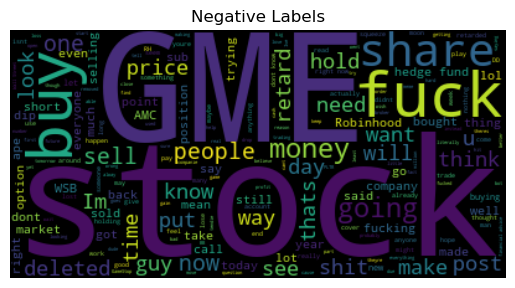

In [6]:
# Apply clean_text function to the 'text' column in df_negative using .loc
df_negative.loc[:, 'cleaned_text'] = df_negative['text'].apply(clean_text)

# Combine the cleaned_text into a single string
negative_text = ' '.join(df_negative['cleaned_text'])

# Generate word cloud for negative labels
wordcloud_negative = WordCloud().generate(negative_text)

# Plot the word cloud for negative labels
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Labels')
plt.axis('off')
plt.show()

